<a href="https://colab.research.google.com/github/permilia9060/music_effects/blob/main/Music_effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"In recent years, the therapeutic benefits of music on mental health have garnered increasing attention. Amidst this growing interest, understanding the nuanced relationship between music and mental conditions remains a compelling area of exploration. Leveraging a dataset sourced from Kaggle, this analysis embarks on a journey to unravel the intricate interplay between music therapy and mental well-being. By delving into the dataset, we aim to shed light on how various mental conditions, such as anxiety, depression, insomnia, and OCD, are influenced by music therapy interventions. Through a combination of exploratory data analysis (EDA), predictive modeling, and feature importance assessment, we endeavor to discern patterns, unearth insights, and perhaps even uncover novel therapeutic avenues. As we delve into this rich tapestry of data, we seek not only to elucidate the impact of music on mental health but also to contribute to the burgeoning field of music therapy research, offering potential avenues for personalized interventions and holistic well-being."

In [1]:
# Load necessary libraries
%%capture
!pip install category_encoders==2.*

In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
from category_encoders import OrdinalEncoder, OneHotEncoder

In [5]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score

In [6]:
# Load Data
from google.colab import files
uploaded = files.upload()

Saving music_effects.csv to music_effects.csv


In [7]:
# Read data into DataFrame
filepath = "music_effects.csv"

In [8]:
df = pd.read_csv(filepath)

In [9]:
# Make data lowercase
for col in df.columns:

  if df[col].dtype == 'object':
     df[col] = df[col].str.lower()

In [10]:
# Make columns lowercase
df.columns = df.columns.str.lower()

In [11]:
# Drop irrelevant column
df.drop(['permissions'], axis=1, inplace=True)

In [12]:
# Drop rows with null values
df.dropna(inplace=True)

In [13]:
# Remove outliers
age_index = df[(df['age'] > 70)].index           # scatterplot for outlier graph
df = df.drop(age_index, axis=0)

In [14]:
# Target Vector-Feature Matrix Split
target = 'music effects'
y = df[target]
X = df.drop(columns=target)

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Define pipelines for Random Forest
rf_pipeline = Pipeline([
    ('encoder', OrdinalEncoder()), # Encode categorical features
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1)) # Fit the model
])

# Define a pipeline for Logistic Regression classifier
lr_pipeline = Pipeline([
    ('encoder', OrdinalEncoder()), # Encode categorical features using Ordinal Encoder
    ('scaler', StandardScaler()), # Scale the features using Standard Scaler
    ('model', LogisticRegression()) # Fit a Logistic Regression classifier model
])

In [17]:
# Model training and evaluation
models = {
    'Random Forest': rf_pipeline,
    'Logistic Regression': lr_pipeline
}

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score}")

Random Forest Accuracy: 0.7723577235772358
Logistic Regression Accuracy: 0.7398373983739838


In [19]:
  # Classification report for logistic regression
if name == 'Logistic Regression':
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     improve       0.78      0.93      0.85        95
   no effect       0.30      0.12      0.17        25
      worsen       0.00      0.00      0.00         3

    accuracy                           0.74       123
   macro avg       0.36      0.35      0.34       123
weighted avg       0.66      0.74      0.69       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-20-d75191a55bda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


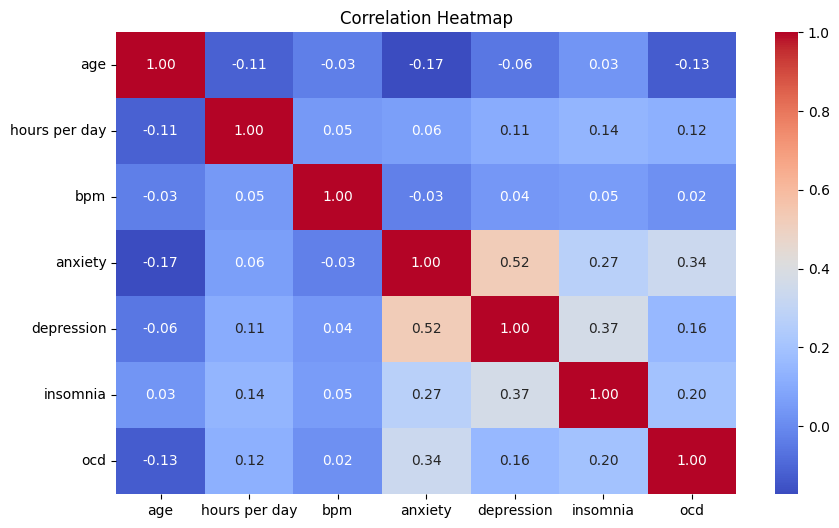

In [20]:
# Additional analysis - Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-21-9178160660d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=condition, y="age", hue='music effects', ci=None)


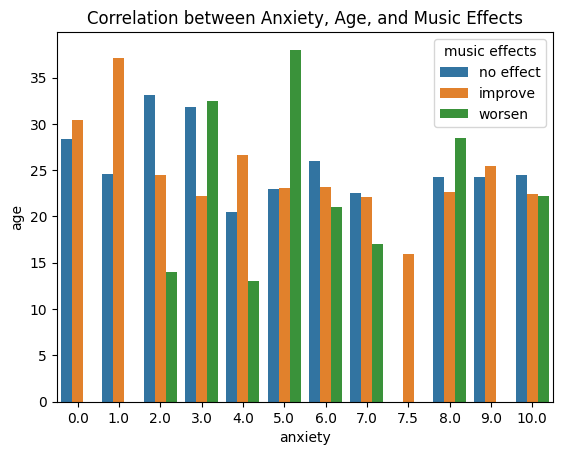

<ipython-input-21-9178160660d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=condition, y="age", hue='music effects', ci=None)


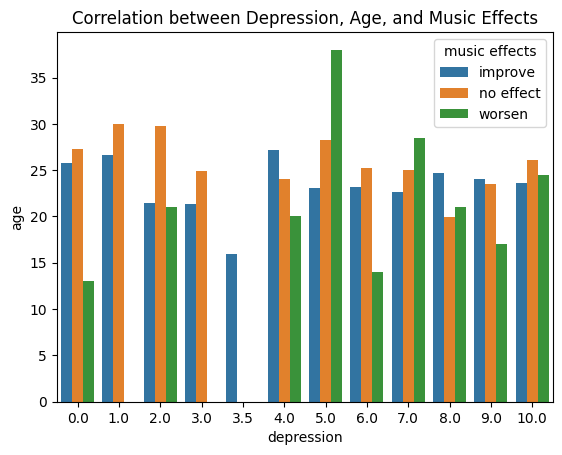

<ipython-input-21-9178160660d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=condition, y="age", hue='music effects', ci=None)


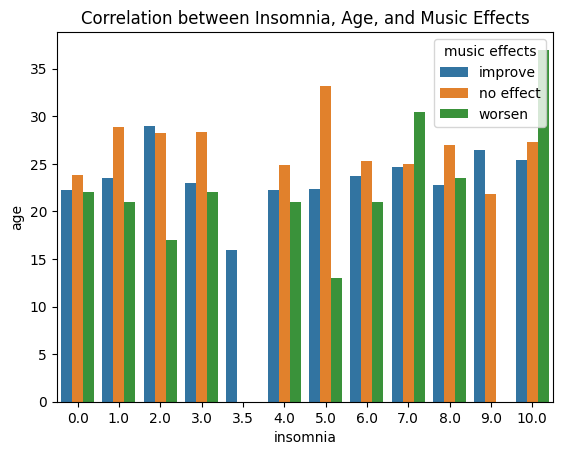

<ipython-input-21-9178160660d0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=condition, y="age", hue='music effects', ci=None)


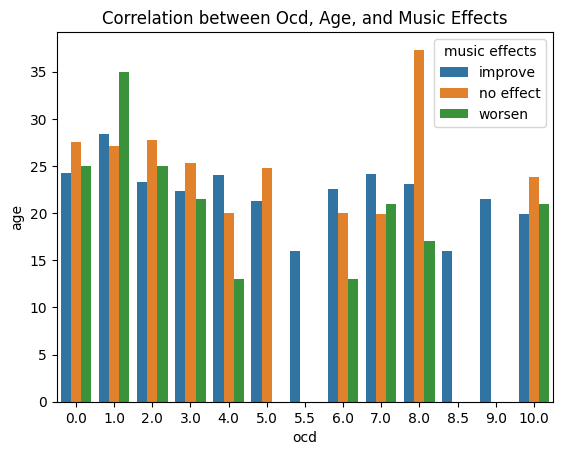

In [21]:
# Additional correlation plots
for condition in ['anxiety', 'depression', 'insomnia', 'ocd']:
    sns.barplot(data=df, x=condition, y="age", hue='music effects', ci=None)
    plt.title(f'Correlation between {condition.capitalize()}, Age, and Music Effects')
    plt.show()

Conclusion:

Our analysis explored the impact of music therapy on mental health, focusing on anxiety, depression, insomnia, and OCD. Using machine learning models like Random Forest and Logistic Regression, we found promising results, with Random Forest outperforming Logistic Regression in predicting music effects. The correlation analysis revealed complex relationships between mental conditions, age, and music effects.

Our findings highlight the potential of music therapy in improving mental well-being. Further research should delve into individual differences and treatment contexts to develop personalized interventions. Overall, our analysis contributes to advancing music therapy research and offers insights for tailored mental health interventions.

